<a href="https://colab.research.google.com/github/aiseongjun/Hands-On-Machine-Learning/blob/main/5_%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0_6_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. 서포트 벡터 머신**

# **5.1 선형 SVM 분류**

**라지 마진 분류**
```
라지 마진 분류는 SVM의 핵심 개념 중 하나로,
데이터를 분류하는 경계와 클래스 간의 마진을 최대화하는 방식을 말합니다.
```
**서포트 벡터**
```
클래스는 경계에 위치한 샘플에 의해 전적으로 결정됩니다.
이런 샘플을 서포트 벡터라고 합니다.
```

## **5.1.1 소프트 마진 분류**

모든 샘플이 경계 바깥쪽에 올바르게 분류되어 있다면 이를 하드 마진 분류라고 합니다. 하드 마진 분류에는 두 가지 문제점이 있습니다. 데이터가 선형적으로 구분될 수 있어야 제대로 작동하며 이상치에 민감합니다.

이런 문제를 피하려면 더 유연한 모델이 필요합니다. 경계의 폭을 가능한 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡아야 합니다. 이를 소프트 마진 분류라고 합니다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 2) # iris-virginica

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, random_state=42)).fit(X, y)

X_new = [[5.5, 1.7], [5.0, 1.5]]
print('svm_clf.predict(X_new):\n {}'.format(svm_clf.predict(X_new)))
print('svm_clf.decision_function(X_new):\n {}'.format(svm_clf.decision_function(X_new)))

svm_clf.predict(X_new):
 [ True False]
svm_clf.decision_function(X_new):
 [ 0.66163816 -0.22035761]


# **5.2 비선형 SVM 분류**

비선형 데이터셋을 다루는 한 가지 방법은 다항 특성과 같은 특성을 더 추가하는 것입니다. 사이킷런을 사용하여 이를 구현하기 위해 PolynomialFeatures 변환기와 StandardScaler, LinearSVC를 연결하여 파이프라인을 만듭니다.

In [2]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42)
).fit(X, y)

## **5.2.1 다항식 커널**

커널 트릭은 실제로는 특성을 추가하지 않으면서 매우 높은 차수의 다항 특성을 많이 추가한 것과 같은 결과를 얻게 해줍니다.

In [3]:
from sklearn.svm import SVC

polynomial_kernel_svm_clf = make_pipeline(StandardScaler(),
                                          SVC(kernel='poly', degree=3, coef0=1, C=5)).fit(X, y)

## **5.2.2 유사도 특성 / 5.2.3 가우스 RBF 커널**

**가우스 RBF 커널**
```
가우스 RBF 커널은 SVM에서 사용하는 커널 함수 중 하나입니다.
이 커널은 데이터를 고차원 공간으로 매핑하여 선형적으로 분리할 수 있게 만드는 데 사용됩니다.
구체적으로, 가우 RBF 커널은 두 점 사이의 거리를 기반으로 값이 결정됩니다.
```
$$K(x, x^{'}) = exp(-\frac{||x - x^{'}||^{2}}{2σ^{2}})$$

In [4]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel='rbf', gamma=5, C=0.001)).fit(X, y)

## **5.2.4 계산 복잡도**

**SVM 분류를 위한 사이킷런 파이썬 클래스 비교**

| 파이썬 클래스   | 시간 복잡도   | 외부 메모리 학습 지원   | 스케일 조정의 필요성   | 커널 트릭     |
| ------- | ------- | ------- | ------- | ------- |
| LinearSVC     | $O(m \cdot n)$     | 아니오     | 예     | 아니오     |
| SVC     | $O(m^{2} \cdot n)$ ~ $O(m^{3} \cdot n)$     | 아니오     | 예     | 예     |
| SGDClassifier     | $O(m \cdot n)$     | 예     | 예     | 아니오     |

# **5.3 SVM 회귀**


SVM을 분류가 아니라 회귀에 적용하는 방법은 일정한 마진 오류 안에서 두 클래스 간의 경계 폭이 가능한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류 안에서 경계 안에 가능한 많은 샘플이 들어가도록 학습합니다.

경계의 폭은 하이퍼파라미터 $ϵ$으로 조절합니다.

In [5]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon=0.5, random_state=42)).fit(X, y)
svm_poly_reg = make_pipeline(StandardScaler(),
                             SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1))

# **5.4 SVM 이론**

**하드 마진 선형 SVM 분류기의 목적 함수**
```
하드 마진 선형 SVM 분류기의 목적함수는 주어진 데이터가 선형적으로 구분 가능할 때,
두 클래스 간의 경계를 최대화하는 것입니다.
이를 통해 새로운 데이터가 주어졌을 때 가장 잘 일반화된 분류기를 만들 수 있습니다.
```
$$\min_{w, b}\frac{1}{2}w^{T}w$$
* [조건] $i = 1, 2, \cdot\cdot\cdot, m$일 때 $t^{(i)}(w^{T}x^{(i)} + b) >= 1$

**소프트 마진 선형 SVM 분류기의 목적 함수**
```
소프트 마진 선형 SVM 분류기의 목적함수는 하드 마진 SVM과 비슷하지만,
데이터가 선형적으로 완벽하게 구분되지 않는 경우에도 잘 동작하도록 마진과 오차를 모두 고려합니다.
이를 통해 모델은 데이터의 잡음이나 일부 오류를 허용하면서도 가능한 한 마진을 크게 만드는 방향으로 학습됩니다.
```
$$\min_{w, b, ζ}\frac{1}{2}w^{T}w + C\sum^{m}_{i=1}ζ^{(i)}$$
* [조건] $i = 1, 2, \cdot\cdot\cdot, m$일 때 $t^{(i)}(w^{T}x^{(i)} + b) >= 1 - ζ^{(i)}$이고 $ζ^{(i)} >= 0$

하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제입니다. 이런 문제를 콰드라틱 프로그래밍 문제라고 합니다.
SVM을 훈련하는 한 가지 방법은 QP 솔버를 사용하는 것입니다. 또 다른 방법은 경사 하강법을 사용하여 힌지 손실 또는 제곱 힌지 손실을 최소화하는 것입니다.

# **5.5 쌍대 문제**

## **5.5.1 커널 SVM**

# **6. 결정 트리**

# **6.1 결정 트리 학습과 시각화**

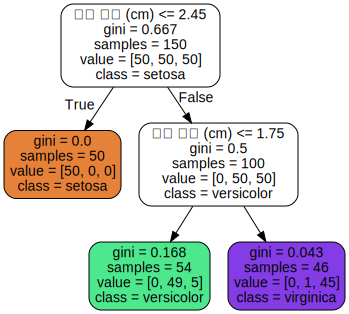

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_iris, y_iris)

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=['꽃잎 길이 (cm)', '꽃잎 너비 (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file('iris_tree.dot')

# **6.2 예측**

**결정 트리의 예측 방법**
```
트리 구조를 기반으로 데이터를 분할하면서 의사 결정을 내리는 방식으로 작동합니다.
결정 트리는 루트 노드에서 시작해서 가지를 따라가며 끝에 리프 노드를 만들게 되는데,
이 리프 노드가 최종적인 예측 값 또는 분류 결과를 제공합니다.
기본적으로 각 노드는 데이터를 분할하는 기준을 제공하고, 각 분할은 데이터의 속성을 기준으로 이루어집니다.
```

**지니 불순도**
```
지니 불순도는 결정 트리 알고리즘에서 데이터를 분할할 때 사용하는 기준 중 하나입니다.
이 지표는 특정 데이터 집합이 얼마나 불순한지를 측정하는 데 사용됩니다.
즉, 주어진 데이터가 몇 개의 클래스에 속하는지에 따라 그 혼합 정도를 나타냅니다.
지니 불순도는 값이 낮을수록 더 순수한 집합을 의미하고, 값이 높을수록 더 혼합된 집합을 의미합니다.
결정 트리에서 지니 불순도를 사용하여 데이터를 분할할 때, 분할 후 각 부분이 최대한 순수하도록 하는 방향으로 트리를 만들어 갑니다.
```
$$G_{i} = 1 - \sum^{n}_{k=1}p_{i,k}^2$$
* $G_{i}$는 i번째 노드의 지니 불순도입니다.
* $p_{i,k}$는 $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율입니다.

# **6.3 클래스 확률 추정**

$$P(c|t) = \frac{N_{c}(t)}{N(t)}$$
* $N_{c}(t)$: 리프 노드 $t$에 있는 클래스 $c$의 샘플 수
* $N(t)$: 리프 노드 $t$에 있는 전체 샘플 수

In [7]:
print('클래스 예측 확률: \n{}'.format(tree_clf.predict_proba([[5, 1.5]]).round(3)))
print('예측 클래스: \n{}'.format(tree_clf.predict([[5, 1.5]])))

클래스 예측 확률: 
[[0.    0.907 0.093]]
예측 클래스: 
[1]


# **6.4 CART 훈련 알고리즘**

먼저 훈련 세트를 하나의 특성 $k$의 임곗값 $t_{k}$를 사용해 두 개의 서브셋으로 나눕니다(예 $k$:꽃잎의 길이 <= $t_{k}$: 2.45cm). 크기에 따른 가중치가 적용된 가장 순수한 서브셋으로 나눌 수 있는 ($k$, $t_{k}$) 쌍을 찾습니다. 비용함수를 통해 이 알고리즘을 최소화해야 합니다.

$$J(k, t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$
* $G_{left/right}$는 왼쪽 / 오른쪽 서브셋의 불순도
* $m_{left/right}$는 왼쪽 / 오른쪽 서브셋의 샘플 수

CART 알고리즘이 훈련 세트를 성공적으로 나누었다면 같은 방식으로 서브셋을 또 나누고 이런 식으로 반복합니다.

# **6.5 계산 복잡도**

예측을 하려면 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야 합니다. 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 약 $O(log_{2}(m))$개 노드를 거쳐야 합니다. 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하게 $O(log_{2}(m))$입니다.

훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교합니다. 각 노드에서 모든 샘플의 모든 특성을 비교하면 훈련 복잡도는 $O(n \cdot mlog_{2}(m))$이 됩니다.

# **6.6 지니 불순도 또는 엔트로피?**

**엔트로피**
```
엔트로피는 분자의 무질서함을 측정하는 것으로 원래 열역학의 개념입니다.
분자가 안정되고 질서정연하면 엔트로피가 0에 가깝습니다.
머신러닝에서는 불순도의 측정 방법으로 자주 사용됩니다.
어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0입니다.
```
**지니 불순도와 엔트로피 중 어떤 것을 사용해야 할까요?**
```
실제로는 큰 차이가 없습니다.
지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋습니다.
그러나 다른 트리가 만들어지는 경우 지니 불순도는 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면,
엔트로피는 조금 더 균형 잡힌 트리를 만듭니다.
```
$$H_{i} = -\sum^{n}_{k=1}p_{i,k}log_{2}(p_{i,k}) \\ (p_{i,k} \neq 0)$$

# **6.7 규제 매개변수**

**비파라미터 모델**
```
비파라미터 모델은 모델을 학습할 때 고정된 수의 파라미터를 사용하지 않고,
데이터를 통해 모델의 구조를 유연하게 정의하는 방식입니다.
즉, 모델의 복잡도가 데이터의 양에 따라 달라지며, 특정한 파라미터 수나 형식을 정하지 않고도 데이터에서 직접 정보를 추출합니다.
```
**DecisionTreeClassifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 하이퍼파라미터가 몇 개 있습니다.**

* max_features: 각 노드에서 분할에 사용할 특성의 최대 수
* max_leaf_nodes: 리프 노드의 최대 수
* min_samples_split: 분할되기 위해 노드가 가져야 하는 최소 샘플 수
* min_sample_leaf: 리프 노드가 생성되기 위해 가지고 있어야 할 최소 샘플 수
* min_weight_fraction_leaf: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율

In [8]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42).fit(X_moons, y_moons)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42).fit(X_moons, y_moons)

X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=42)

print('tree_clf1.score: {}'.format(tree_clf1.score(X_moons_test, y_moons_test)))
print('tree_clf2.score: {}'.format(tree_clf2.score(X_moons_test, y_moons_test)))

tree_clf1.score: 0.901
tree_clf2.score: 0.918


# **6.8 회귀**

**회귀 CART 알고리즘**
```
CART 알고리즘은 훈련 세트 불순도를 최소화하는 방향으로 분할하는 대신 MSE를 최소화하도록 분할하는 것을 제외하고는 분류와 거의 비슷하게 작동합니다.
```
$$J(k,t_{k}) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$
* $MSE_{mode} = \frac{1}{m_{node}}\sum_{i\in node} (\hat{y}_{node} - y^{(i)})^2$
* $\hat{y}_{node} = \frac{1}{m_{node}}\sum_{i\in node}y^{(i)}$

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # 랜덤한 하나의 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X_quad, y_quad)

# **6.9 축 방향에 대한 민감성**

결정 트리는 계단 모양의 결정 경계를 만듭니다(모든 분할은 축에 수직입니다). 그래서 데이터의 방향에 민감합니다.

이 문제를 제한하는 한 가지 방법은 데이터의 스케일을 조정한 다음 주성분 분석(PCA) 변환을 적용하는 것입니다.

In [10]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_iris_rotated, y_iris)

# **6.10 결정 트리의 분산 문제**

일반적으로 결정 트리의 주요 문제는 분산이 상당히 크다는 것입니다. 즉, 하이퍼파라미터나 데이터를 조금만 변경해도 매우 다른 모델이 생성될 수 있습니다.

다행히도 여러 결정 트리의 예측을 평균하면 분산을 크게 줄일 수 있습니다. 이러한 결정 트리의 앙상블을 랜덤 포레스트라고 합니다.